# Домашня робота 11

In [13]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

### Завантажимо датасет, розділимо на вибірки

In [9]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=15000)

max_len = 250
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### Побудуємо RNN модель та візулізуємо результати

In [13]:
model_rnn = Sequential([
    Embedding(150000, 64, input_length=max_len),
    SimpleRNN(32, return_sequences=False,activation="relu"),
    Dropout(0.2),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer="adam", loss='Huber', metrics=['accuracy'])
model_rnn.summary()

history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 64)           9600000   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 30)                990       
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9604415 (36.64 MB)
Trainable params: 960

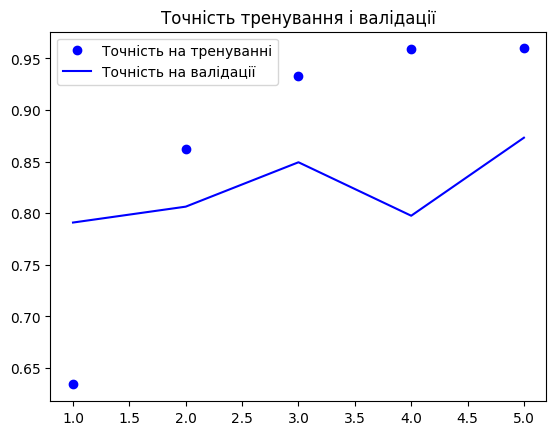

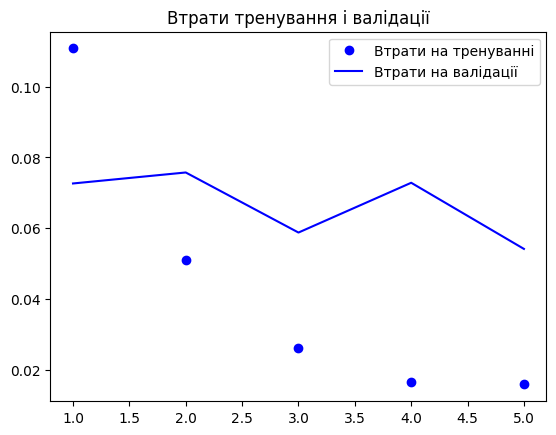

In [25]:
acc = history_rnn.history['accuracy']
val_acc = history_rnn.history['val_accuracy']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
plt.plot(epochs, val_acc, 'b', label='Точність на валідації') 
plt.title('Точність тренування і валідації')  
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend() 

plt.show() 

### Побудуємо двосторонню RNN модель та візулізуємо результати

In [35]:
model_rnn_b = Sequential([
    Embedding(150000, 64, input_length=max_len),
    Bidirectional(SimpleRNN(64, return_sequences=False,activation="relu")),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_rnn_b.compile(optimizer="rmsprop", loss='Huber', metrics=['accuracy'])
model_rnn_b.summary()

history_rnn_b = model_rnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 300, 64)           9600000   
                                                                 
 bidirectional_12 (Bidirect  (None, 128)               16512     
 ional)                                                          
                                                                 
 dense_37 (Dense)            (None, 30)                3870      
                                                                 
 dense_38 (Dense)            (None, 10)                310       
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                     

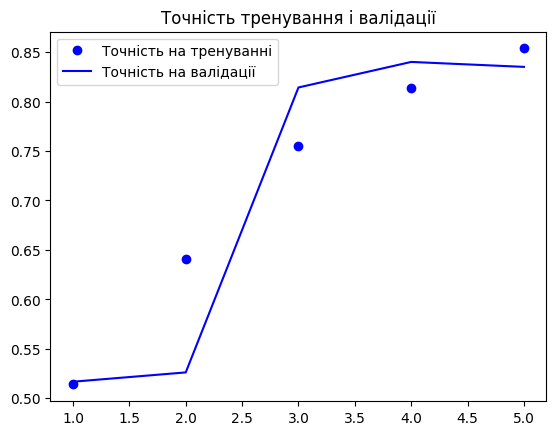

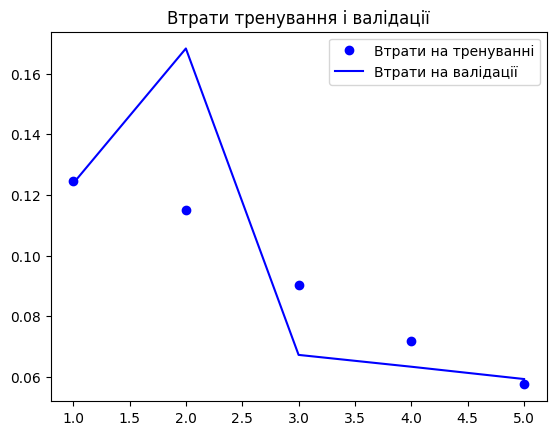

In [36]:
acc = history_rnn_b.history['accuracy']
val_acc = history_rnn_b.history['val_accuracy']
loss = history_rnn_b.history['loss']
val_loss = history_rnn_b.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
plt.plot(epochs, val_acc, 'b', label='Точність на валідації') 
plt.title('Точність тренування і валідації')  
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend() 

plt.show() 

### Побудуємо LNN модель та візулізуємо результати

In [58]:
model_lnn = Sequential([
    Embedding(15000, 64, input_length=max_len),
    LSTM(32, return_sequences=True,activation="relu"),
    LSTM(16,activation="relu"),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model_lnn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model_lnn.summary()

history_lnn = model_lnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_32 (Embedding)    (None, 250, 64)           960000    
                                                                 
 lstm_30 (LSTM)              (None, 250, 32)           12416     
                                                                 
 lstm_31 (LSTM)              (None, 16)                3136      
                                                                 
 dense_86 (Dense)            (None, 30)                510       
                                                                 
 dense_87 (Dense)            (None, 10)                310       
                                                                 
 dropout_32 (Dropout)        (None, 10)                0         
                                                                 
 dense_88 (Dense)            (None, 1)               

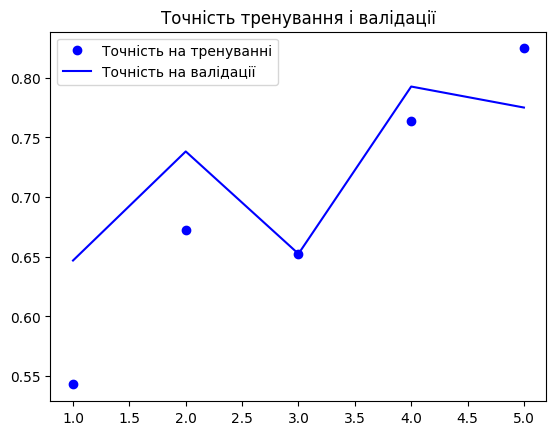

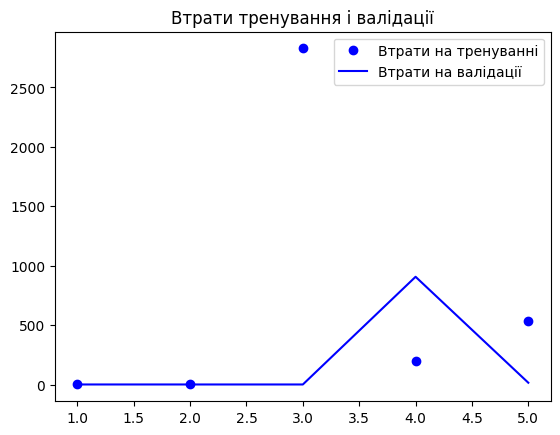

In [59]:
acc = history_lnn.history['accuracy']
val_acc = history_lnn.history['val_accuracy']
loss = history_lnn.history['loss']
val_loss = history_lnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
plt.plot(epochs, val_acc, 'b', label='Точність на валідації') 
plt.title('Точність тренування і валідації')  
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend() 

plt.show() 

### Побудуємо двохсторонню LNN модель та візулізуємо результати

In [41]:
max_features = 2000 
maxlen = 200 

In [42]:
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(max_features, 128)(inputs)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_11 (Embedding)    (None, None, 128)         256000    
                                                                 
 bidirectional_19 (Bidirect  (None, None, 128)         98816     
 ional)                                                          
                                                                 
 bidirectional_20 (Bidirect  (None, 128)               98816     
 ional)                                                          
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 453761 (1.73 MB)
Trainable params: 453761 (1.

In [43]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=max_features)
x_train = keras.utils.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.utils.pad_sequences(x_val, maxlen=maxlen)

In [44]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history_lnn_b = model.fit(x_train, y_train, batch_size=32, epochs=3, validation_data=(x_val, y_val))

Epoch 1/3
782/782 [==============================] - 484s 613ms/step - loss: 0.4278 - accuracy: 0.8013 - val_loss: 0.3253 - val_accuracy: 0.8661
Epoch 2/3
782/782 [==============================] - 505s 646ms/step - loss: 0.3137 - accuracy: 0.8679 - val_loss: 0.3087 - val_accuracy: 0.8685
Epoch 3/3
782/782 [==============================] - 506s 647ms/step - loss: 0.2763 - accuracy: 0.8863 - val_loss: 0.3378 - val_accuracy: 0.8602


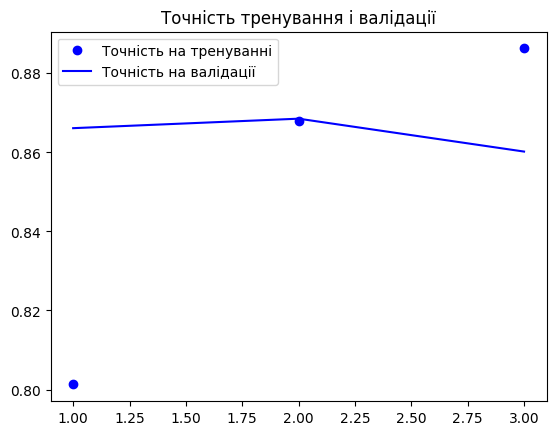

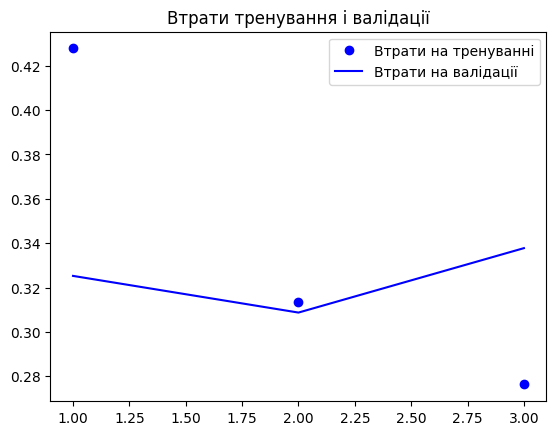

In [45]:
acc = history_lnn_b.history['accuracy']
val_acc = history_lnn_b.history['val_accuracy']
loss = history_lnn_b.history['loss']
val_loss = history_lnn_b.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  
plt.plot(epochs, val_acc, 'b', label='Точність на валідації') 
plt.title('Точність тренування і валідації')  
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend() 

plt.show() 